In [185]:
#https://github.com/indohito/EE399/tree/main/EE399HW4
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50,1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# first 20 training last 10 is test data
train_X_f20 = torch.from_numpy(X[:20]).reshape(-1,1).float()
train_Y_l20 = torch.from_numpy(Y[:20]).reshape(-1,1).float()

test_X_l10 = torch.from_numpy(X[20:]).reshape(-1,1).float()
test_Y_l10 = torch.from_numpy(Y[20:]).reshape(-1,1).float()


# first 10 and last 10 are training data middle 10 is test data
train_X_f10l10 = torch.from_numpy(np.concatenate((X[:10], X[21:]))).reshape(-1,1).float()
train_Y_f10l10 = torch.from_numpy(np.concatenate((Y[:10], Y[21:]))).reshape(-1,1).float()

test_X_m10 = torch.from_numpy(X[10:21]).reshape(-1,1).float()
test_Y_m10 = torch.from_numpy(Y[10:21]).reshape(-1,1).float()

net = Net()  

In [186]:
def train(net, x_train, y_train, num_epochs):
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr = .01)
    for epoch in range(num_epochs):
        losses = []
        for i, (x,y) in enumerate(zip(x_train, y_train)):
            optimizer.zero_grad()
            outputs = net(x_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            if (epoch+1)%10 == 0 and (i+1)%20 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(x_train)}], Loss : {loss.item():.2f}')
        

In [187]:
def test(net, x_test, y_test):
    criterion = nn.MSELoss()
    with torch.no_grad():
        outputs = net(x_test)
        test_loss = criterion(outputs, y_test)
    print(f'Test_Loss: {test_loss.item()}')
        

In [188]:
train(net, train_X_f20, train_Y_l20,100)

Epoch [10/100], Step [20/20], Loss : 92.46
Epoch [20/100], Step [20/20], Loss : 23.03
Epoch [30/100], Step [20/20], Loss : 14.74
Epoch [40/100], Step [20/20], Loss : 13.68
Epoch [50/100], Step [20/20], Loss : 13.54
Epoch [60/100], Step [20/20], Loss : 13.52
Epoch [70/100], Step [20/20], Loss : 13.52
Epoch [80/100], Step [20/20], Loss : 13.52
Epoch [90/100], Step [20/20], Loss : 13.52
Epoch [100/100], Step [20/20], Loss : 13.52


In [189]:
test(net, test_X_l10, test_Y_l10)

Test_Loss: 145.6686248779297


In [190]:
train(net, train_X_f10l10, train_Y_f10l10, 100)

Epoch [10/100], Step [20/20], Loss : 90.63
Epoch [20/100], Step [20/20], Loss : 64.61
Epoch [30/100], Step [20/20], Loss : 60.84
Epoch [40/100], Step [20/20], Loss : 60.32
Epoch [50/100], Step [20/20], Loss : 60.25
Epoch [60/100], Step [20/20], Loss : 60.24
Epoch [70/100], Step [20/20], Loss : 60.24
Epoch [80/100], Step [20/20], Loss : 60.24
Epoch [90/100], Step [20/20], Loss : 60.24
Epoch [100/100], Step [20/20], Loss : 60.24


In [191]:
test(net, test_X_m10, test_Y_m10)

Test_Loss: 11.237231254577637


In [207]:
from sklearn.decomposition import PCA

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_images = train_dataset.data.reshape((len(train_dataset), -1))
test_images = test_dataset.data.reshape((len(test_dataset), -1))

pca = PCA(n_components=20)
train_images_pca = pca.fit_transform(train_images)
train_images_pca = pca.transform(test_images)

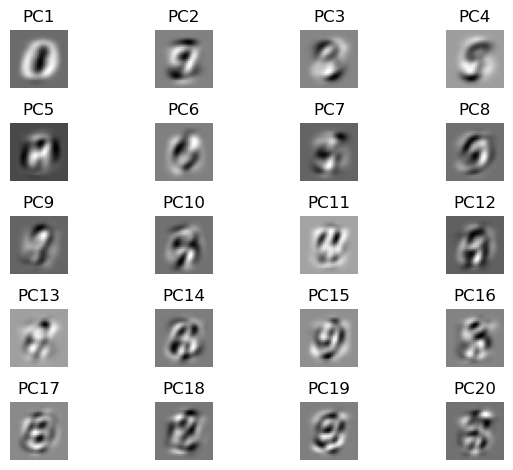

In [209]:
import matplotlib.pyplot as plt
components = pca.components_
for i in range(componenets.shape[0]):  
    plt.subplot(5, 4, 1 + i)
    plt.imshow(components[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title('PC' + str(i+1))
plt.tight_layout()
plt.show()

In [214]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 50)
        self.fc3 = nn.Linear(50, 10)
    def forward(self, x):
        x = x.view(-1, 784) # flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Train the network
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 938 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))


Epoch [1/10], Step [938/938], Loss: 0.8170
Epoch [2/10], Step [938/938], Loss: 0.5283
Epoch [3/10], Step [938/938], Loss: 0.3802
Epoch [4/10], Step [938/938], Loss: 0.3226
Epoch [5/10], Step [938/938], Loss: 0.2300
Epoch [6/10], Step [938/938], Loss: 0.2764
Epoch [7/10], Step [938/938], Loss: 0.5054
Epoch [8/10], Step [938/938], Loss: 0.2646
Epoch [9/10], Step [938/938], Loss: 0.3624
Epoch [10/10], Step [938/938], Loss: 0.1452


In [215]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 93.6 %


In [237]:

# Hyperparameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 5
learning_rate = 0.001

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])

        return out

model = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 600 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy of the model on the {total} test images: {(correct / total) * 100:.2f} %')


Epoch [1/5], Step [100/600], Loss: 0.6752
Epoch [1/5], Step [200/600], Loss: 0.3586
Epoch [1/5], Step [300/600], Loss: 0.2033
Epoch [1/5], Step [400/600], Loss: 0.1601
Epoch [1/5], Step [500/600], Loss: 0.1638
Epoch [1/5], Step [600/600], Loss: 0.2155
Epoch [2/5], Step [100/600], Loss: 0.2003
Epoch [2/5], Step [200/600], Loss: 0.1319
Epoch [2/5], Step [300/600], Loss: 0.1303
Epoch [2/5], Step [400/600], Loss: 0.0912
Epoch [2/5], Step [500/600], Loss: 0.0384
Epoch [2/5], Step [600/600], Loss: 0.1786
Epoch [3/5], Step [100/600], Loss: 0.0451
Epoch [3/5], Step [200/600], Loss: 0.0568
Epoch [3/5], Step [300/600], Loss: 0.1793
Epoch [3/5], Step [400/600], Loss: 0.0632
Epoch [3/5], Step [500/600], Loss: 0.0266
Epoch [3/5], Step [600/600], Loss: 0.0239
Epoch [4/5], Step [100/600], Loss: 0.0124
Epoch [4/5], Step [200/600], Loss: 0.0134
Epoch [4/5], Step [300/600], Loss: 0.0113
Epoch [4/5], Step [400/600], Loss: 0.0206
Epoch [4/5], Step [500/600], Loss: 0.0501
Epoch [4/5], Step [600/600], Loss: